In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

import src.functional.functional as F
import src.dataflow.dataflow as data

## Dataset


Всего в датасете 60000 изображений 32х32х3 для 10 классов:
- airplane
- automobile
- bird
- deer
- dog
- frog
- horse
- ship
- truck

Изображения разбиты на 6 групп по 10000 штук - 5 тренировочных и одна тестовая.

In [2]:
dataset_labels = {}

for i in range(5):
    data_batch = F.unpickle(f"data/data_batch_{i + 1}")
    dataset_labels[data_batch[b"batch_label"]] = data_batch[b"labels"]

test_batch = F.unpickle("data/test_batch")
dataset_labels[test_batch[b"batch_label"]] = test_batch[b"labels"]

test_images = test_batch[b"data"].reshape((-1, 3, 32, 32)).transpose((0, 2, 3, 1))

#### Labels balance

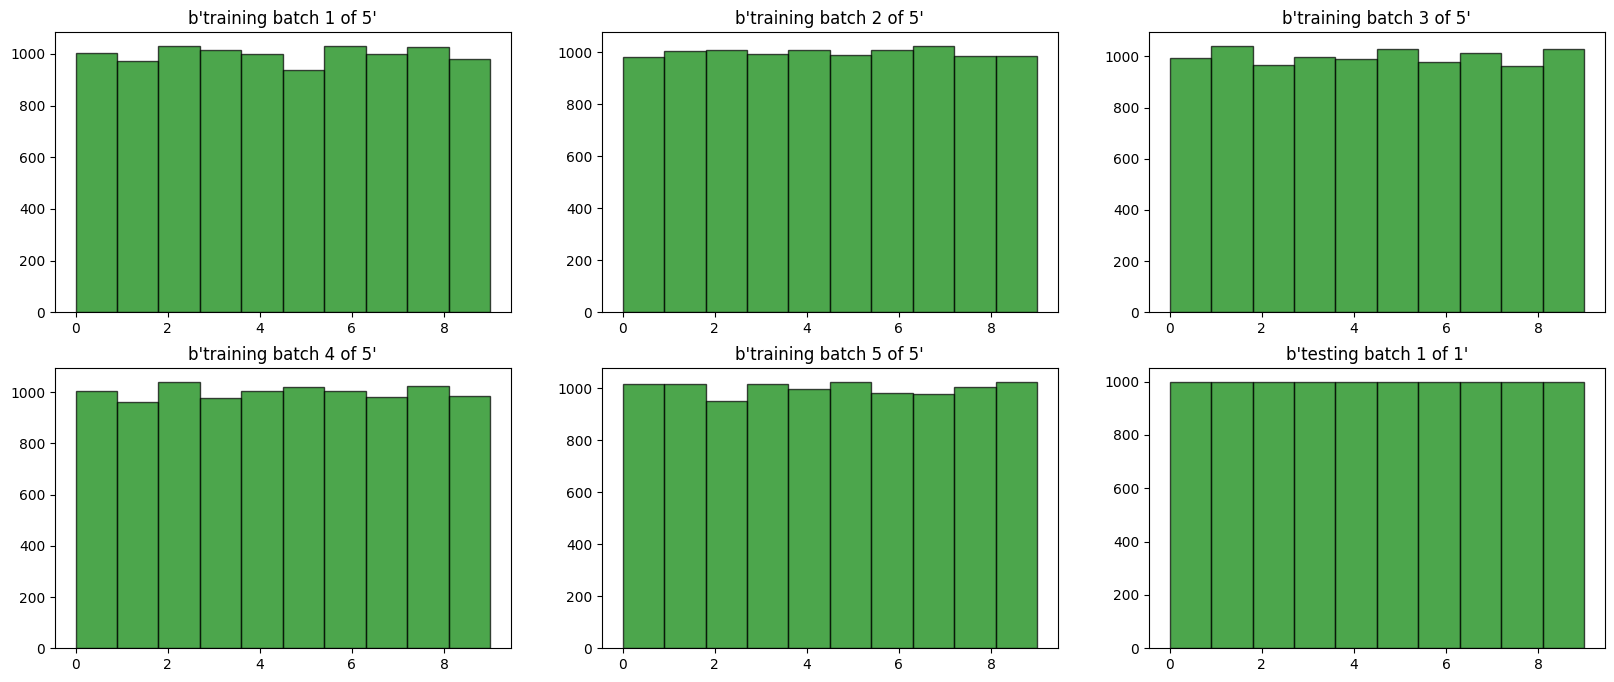

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

for i, key in enumerate(dataset_labels.keys()):
    ax[i // 3][i % 3].set_title(str(key))
    ax[i // 3][i % 3].hist(dataset_labels[key], bins=10, edgecolor="black", color="green", alpha=0.7)


plt.show()

#### Image samples

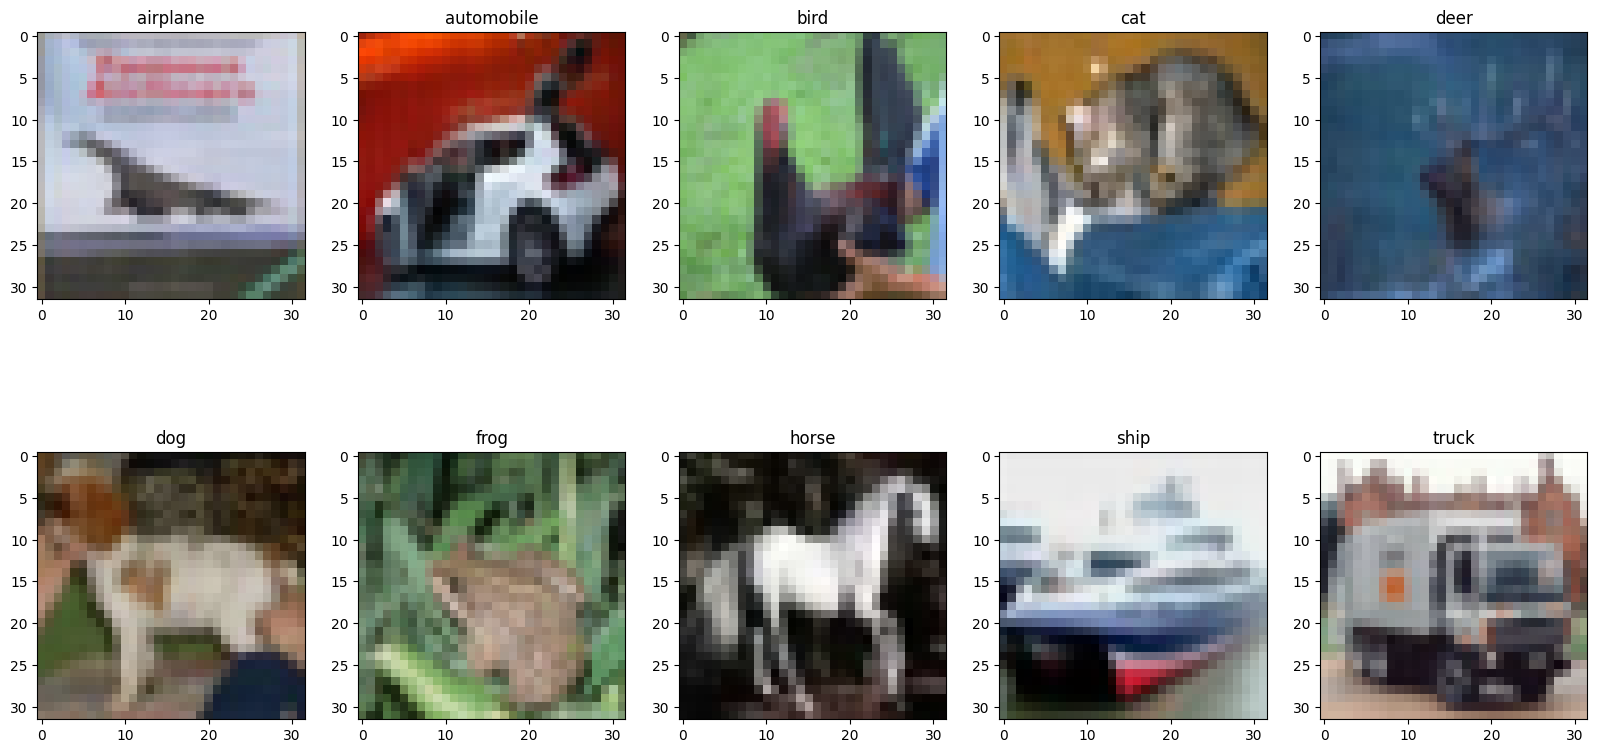

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

for i in range(10):
    idx = test_batch[b"labels"].index(i)
    ax[i // 5][i % 5].set_title(data.CLASS_NAMES[i])
    ax[i // 5][i % 5].imshow(test_images[idx])

plt.show()

## Model

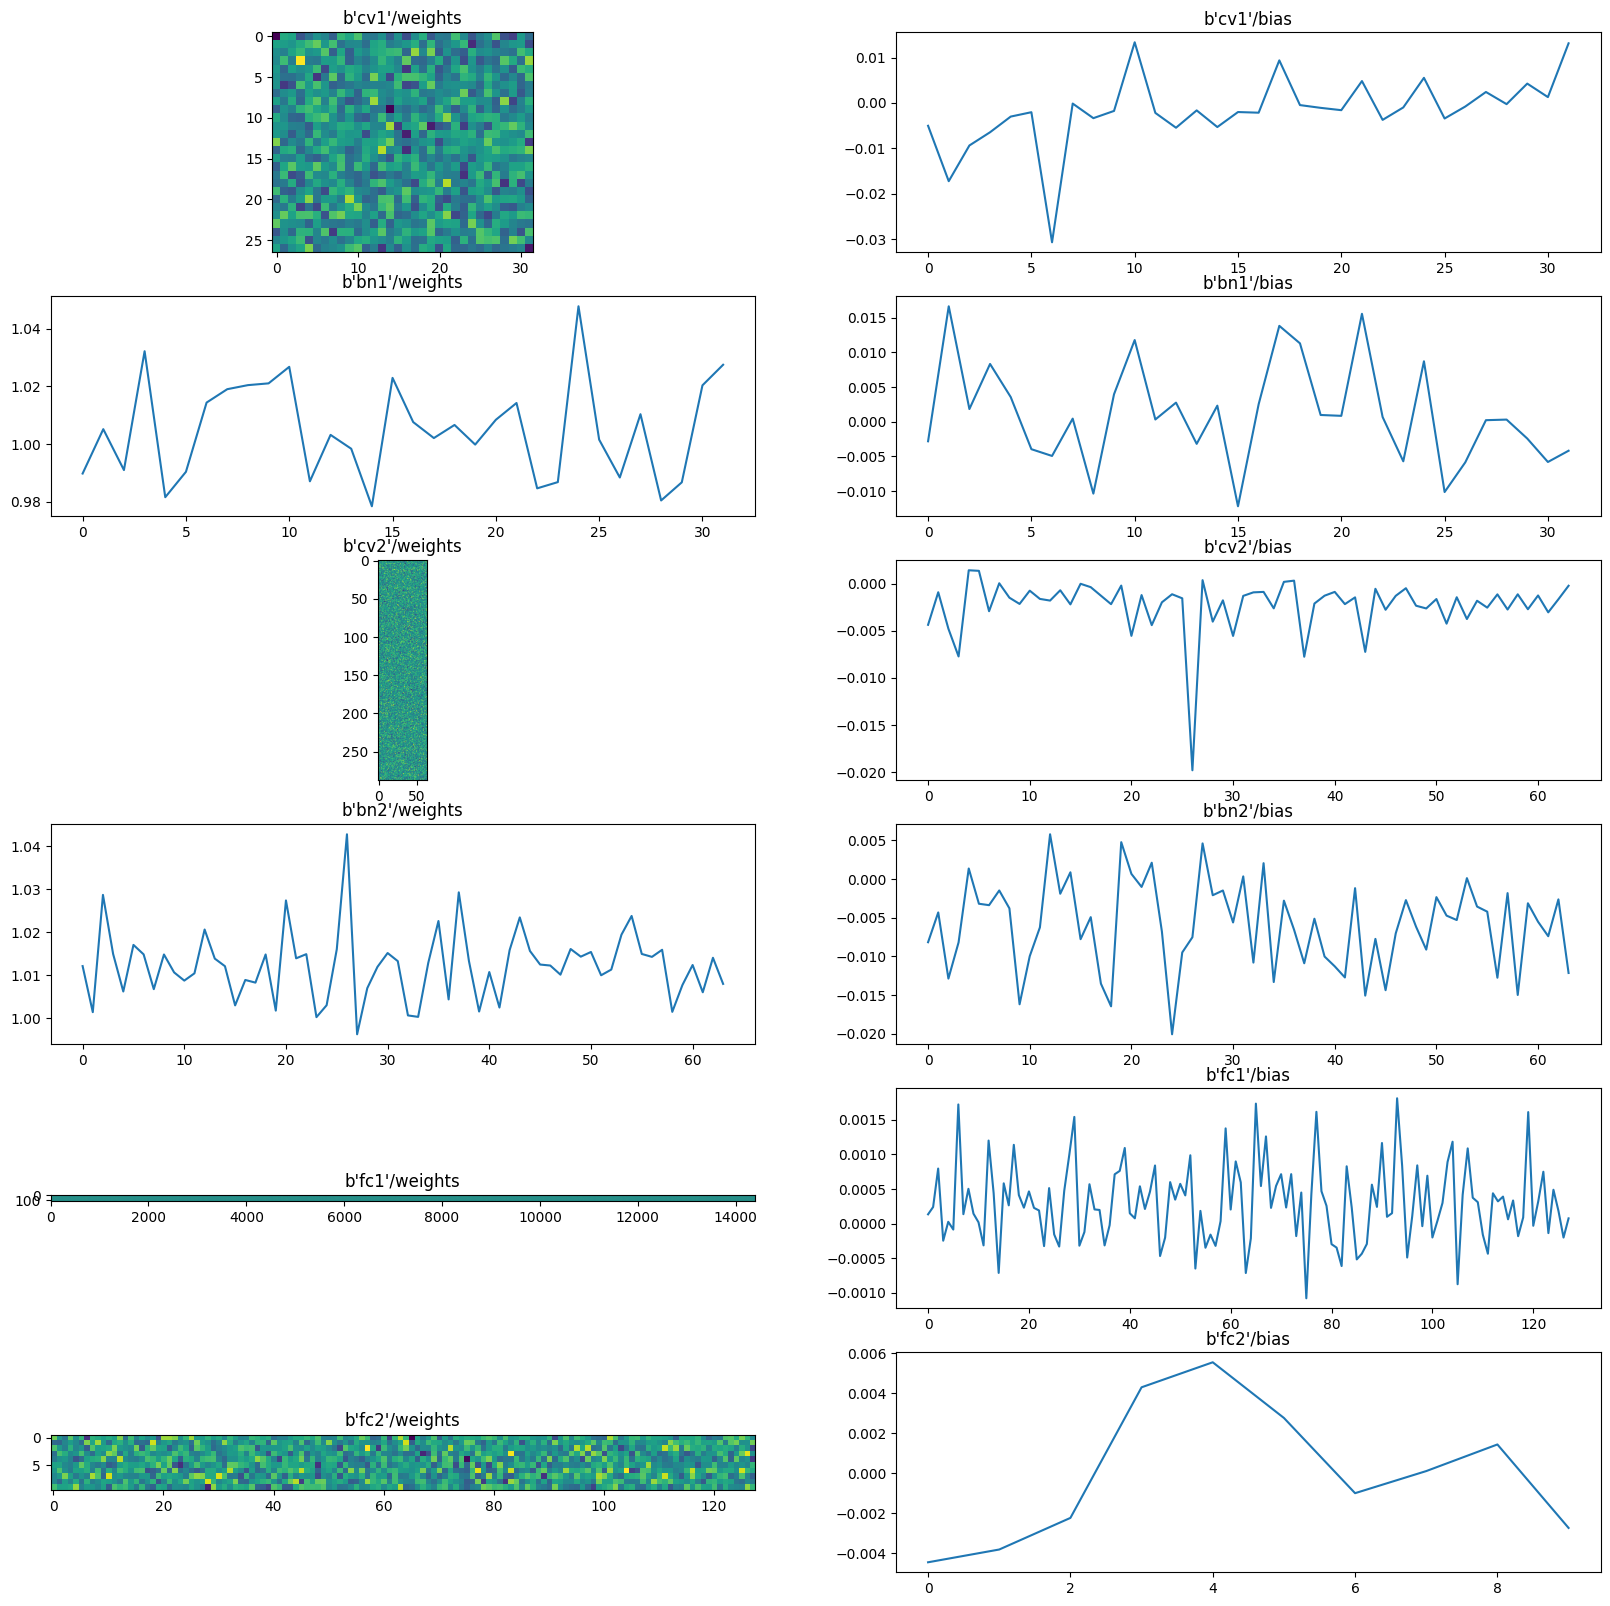

In [5]:
model_params = F.unpickle("results/model_last.plk")

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))

for i, key in enumerate(model_params.keys()):
    for j in range(2):
        ax[i][j].set_title(f"{key}/{["weights", "bias"][j]}")
        if len(model_params[key][j].shape) < 2:
            ax[i][j].plot(model_params[key][j])
        else:
            ax[i][j].imshow(model_params[key][j])

plt.show()

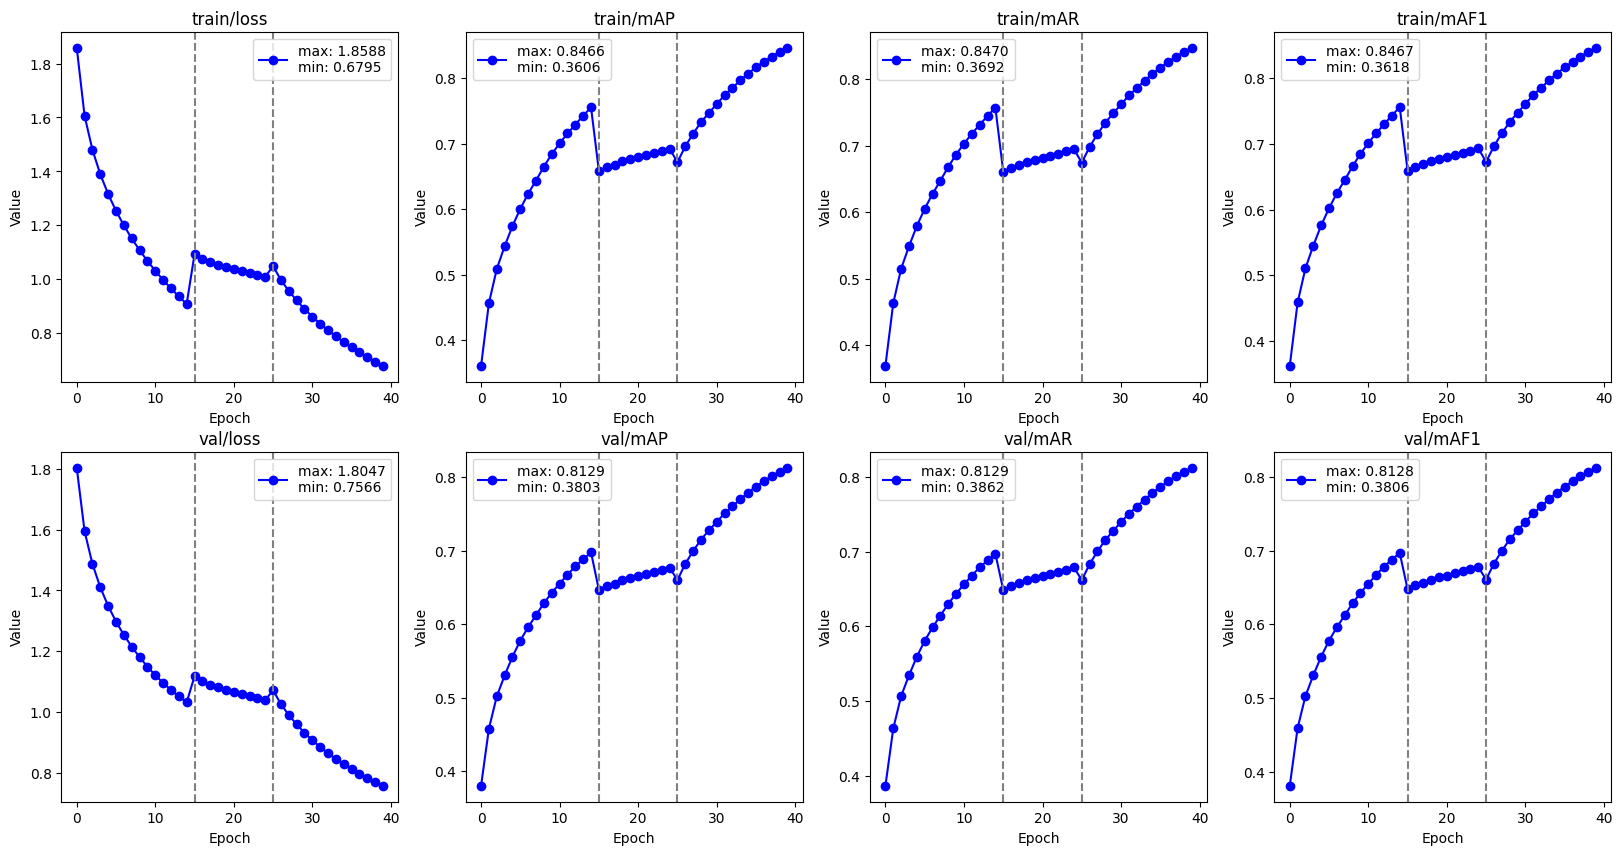

In [6]:
with open("results/total_results.json", "r") as f:
    data = json.load(f)

fig, ax = plt.subplots(nrows=len(data.keys()), ncols=len(data["train"].keys()), figsize=(20, 10))

for i, phase in enumerate(data.keys()):
    for j, metric in enumerate(data[phase].keys()):
        ax[i][j].plot(data[phase][metric], "b-o",
                      label=f"max: {max(data[phase][metric]):.4f}\nmin: {min(data[phase][metric]):.4f}")
        ax[i][j].axvline(15, color="gray", linestyle="--")
        ax[i][j].axvline(25, color="gray", linestyle="--")

        ax[i][j].set_title(f"{phase}/{metric}")
        ax[i][j].set_xlabel("Epoch")
        ax[i][j].set_ylabel("Value")
        ax[i][j].legend()

plt.show()